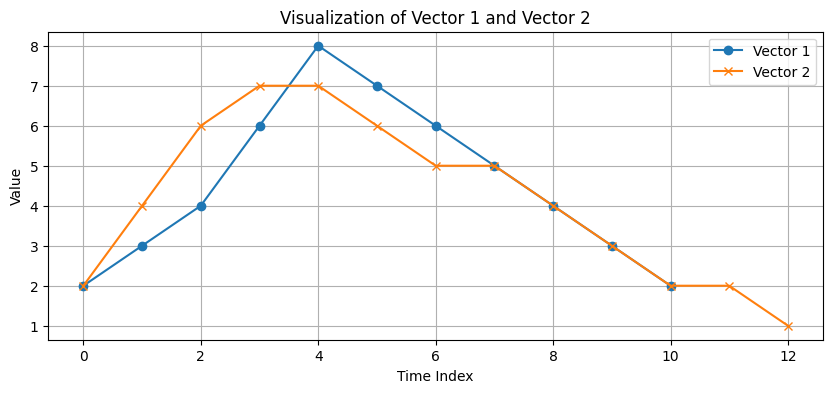

Accumulated Cost Matrix:
 [[  0.   4.  20.  45.  70.  86.  95. 104. 108. 109. 109. 109. 110.]
 [  1.   1.  10.  26.  42.  51.  55.  59.  60.  60.  61.  62.  66.]
 [  5.   1.   5.  14.  23.  27.  28.  29.  29.  30.  34.  38.  47.]
 [ 21.   5.   1.   2.   3.   3.   4.   5.   9.  18.  34.  50.  63.]
 [ 57.  21.   5.   2.   3.   7.  12.  13.  21.  34.  54.  70.  99.]
 [ 82.  30.   6.   2.   2.   3.   7.  11.  20.  36.  59.  79. 106.]
 [ 98.  34.   6.   3.   3.   2.   3.   4.   8.  17.  33.  49.  74.]
 [107.  35.   7.   7.   7.   3.   2.   2.   3.   7.  16.  25.  41.]
 [111.  35.  11.  16.  16.   7.   3.   3.   2.   3.   7.  11.  20.]
 [112.  36.  20.  27.  32.  16.   7.   7.   3.   2.   3.   4.   8.]
 [112.  40.  36.  45.  52.  32.  16.  16.   7.   3.   2.   2.   3.]]


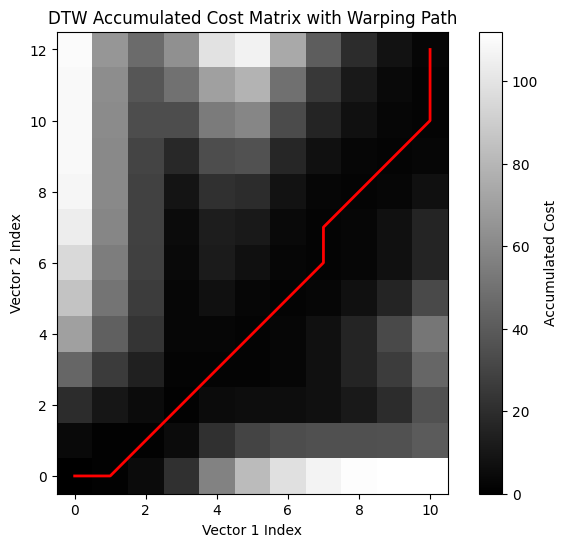

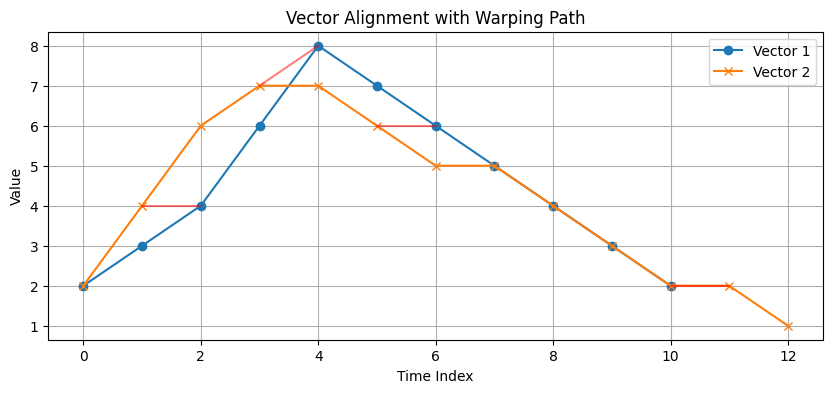

DTW Distance between Vector 1 and Vector 2: 3.00

Inference:
- The warping path shows how elements of Vector 1 align with elements of Vector 2,
  even when one vector is stretched or compressed in time.
- DTW allows non-linear alignment, meaning repeated or skipped elements are properly accounted for.
- The DTW distance quantifies similarity: smaller values indicate greater similarity.
- Here, the vectors are similar overall, but the stretching and extra points in Vector 2 increase the DTW distance.
- DTW is effective in aligning sequences that are temporally distorted or stretched.



In [1]:
# Lab Exercise 6 – Dynamic Time Warping (DTW)
# Complete Implementation

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Given Data
# -----------------------------
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

# -----------------------------
# Step 2: Plot both vectors
# -----------------------------
plt.figure(figsize=(10, 4))
plt.plot(vector1, label='Vector 1', marker='o')
plt.plot(vector2, label='Vector 2', marker='x')
plt.title('Visualization of Vector 1 and Vector 2')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Step 3: Implement DTW
# -----------------------------
def dtw(x, y):
    n, m = len(x), len(y)
    cost = np.zeros((n, m))
    
    # Step 3a: Compute cost matrix
    for i in range(n):
        for j in range(m):
            cost[i, j] = (x[i] - y[j])**2
    
    # Step 3b: Accumulate cost matrix
    acc_cost = np.zeros((n, m))
    acc_cost[0, 0] = cost[0, 0]
    
    for i in range(1, n):
        acc_cost[i, 0] = cost[i, 0] + acc_cost[i-1, 0]
    for j in range(1, m):
        acc_cost[0, j] = cost[0, j] + acc_cost[0, j-1]
    for i in range(1, n):
        for j in range(1, m):
            acc_cost[i, j] = cost[i, j] + min(acc_cost[i-1, j],    # insertion
                                              acc_cost[i, j-1],    # deletion
                                              acc_cost[i-1, j-1])  # match
    return acc_cost

# Compute accumulated cost matrix
acc_cost_matrix = dtw(vector1, vector2)
print("Accumulated Cost Matrix:\n", acc_cost_matrix)

# -----------------------------
# Step 4: Find Optimal Warping Path
# -----------------------------
def find_warping_path(acc_cost):
    i, j = np.array(acc_cost.shape) - 1
    path = [(i, j)]
    
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            direction = np.argmin([acc_cost[i-1, j-1], acc_cost[i-1, j], acc_cost[i, j-1]])
            if direction == 0:
                i -= 1
                j -= 1
            elif direction == 1:
                i -= 1
            else:
                j -= 1
        path.append((i, j))
    
    path.reverse()
    return np.array(path)

warping_path = find_warping_path(acc_cost_matrix)

# -----------------------------
# Step 5: Visualize Warping Path on Cost Matrix
# -----------------------------
plt.figure(figsize=(8, 6))
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(warping_path[:, 0], warping_path[:, 1], 'r', linewidth=2)  # path in red
plt.title('DTW Accumulated Cost Matrix with Warping Path')
plt.xlabel('Vector 1 Index')
plt.ylabel('Vector 2 Index')
plt.colorbar(label='Accumulated Cost')
plt.show()

# -----------------------------
# Step 6: Optional: Warping Lines Between Vectors
# -----------------------------
plt.figure(figsize=(10, 4))
plt.plot(vector1, label='Vector 1', marker='o')
plt.plot(vector2, label='Vector 2', marker='x')
for (i, j) in warping_path[::2]:  # take every 2nd point for clarity
    plt.plot([i, j], [vector1[i], vector2[j]], 'r', alpha=0.5)
plt.title('Vector Alignment with Warping Path')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Step 7: Calculate DTW Distance
# -----------------------------
dtw_distance = acc_cost_matrix[-1, -1]
print(f"DTW Distance between Vector 1 and Vector 2: {dtw_distance:.2f}")

# -----------------------------
# Step 8: Inference
# -----------------------------
inference = """
Inference:
- The warping path shows how elements of Vector 1 align with elements of Vector 2,
  even when one vector is stretched or compressed in time.
- DTW allows non-linear alignment, meaning repeated or skipped elements are properly accounted for.
- The DTW distance quantifies similarity: smaller values indicate greater similarity.
- Here, the vectors are similar overall, but the stretching and extra points in Vector 2 increase the DTW distance.
- DTW is effective in aligning sequences that are temporally distorted or stretched.
"""
print(inference)
